In [104]:
import numpy
import math
from matplotlib import pyplot
from scipy import integrate

In [105]:
%matplotlib inline

In [106]:
ms = 50
g = 9.81
rho = 1.019
r = 0.5
A = math.pi*r**2
v_e = 325.
C_d = 0.15
mf = 100.
mdot = 20.0
v0 = 0.0
h0 = 0.0
print ("Area:",A,"sq.m")

Area: 0.7853981633974483 sq.m


In [107]:
# time derivatives
def f(u):
    v = u[0]
    h = u[1]
    return numpy.array([-g + (mdot/(ms+mf))*v_e- (0.5*rho*v*abs(v)*numpy.pi*r**2*C_d)/(ms + mf), v])

In [108]:
# function to solve eulers 
def euler_step(u, f, dt):
    return u + dt * f(u)

In [109]:
def get_rocket(v0,h0):
    T=40.0
    dt = 0.1
    N = int(T/dt)+1
    t= numpy.linspace(0.0, T, N)
    u= numpy.empty((N,2))
    u[0]= numpy.array([v0, h0])
    global mf
    global mdot
    for n in range(N-1):
        mf=mf-mdot*dt
        if (mf<=0):
            mf = 0
            mdot = 0
        u[n+1]=euler_step(u[n], f, dt)
        print (n, u[n+1,0], u[n+1,1])
        if (u[n+1, 1]<0):
            break
    return u,t,n

In [110]:
[u,t,n] =get_rocket(v0,h0)

v= u[0:n,0]
h= u[0:n,1]
t= t[0:n]

0 3.410891891891892 0.0
1 6.8814683776001395 0.3410891891891892
2 10.412383366822482 1.0292360269492031
3 14.004265288236702 2.070474363631451
4 17.657713942266692 3.4709008924551217
5 21.37329713660551 5.236672286681791
6 25.151547093652006 7.374002000342342
7 28.992956618843234 9.889156709707542
8 32.89797501874105 12.788452371591866
9 36.86700375766772 16.07824987346597
10 40.900391841691594 19.764950249232744
11 44.99843091885218 23.854989433401904
12 49.16135008469581 28.354832525287122
13 53.38931038248304 33.2709675337567
14 57.68239898784112 38.60989857200501
15 62.040623068186164 44.37813847078912
16 66.46390330794684 50.58220077760774
17 70.95206709150348 57.228591108402426
18 75.50484133683398 64.32379781755277
19 80.12184497415052 71.87428195123617
20 84.80258106534343 79.88646644865122
21 89.54642856184134 88.36672455518556
22 94.3526337005768 97.32136741136969
23 99.22030104013655 106.75663078142738
24 104.14838414190197 116.67866088544103
25 109.13567590407281 127.093499

(1363.0796768801306, 159)


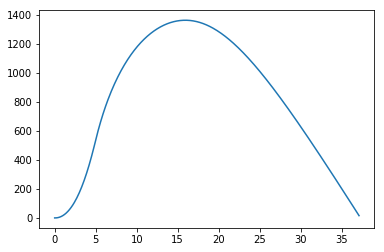

In [114]:
pyplot.figure
pyplot.plot(t,h)
(hmax,index) = max((h,i) for i,h in enumerate(h))
print((hmax,index))

(234.13455068339314, 49)
513.3664913990398


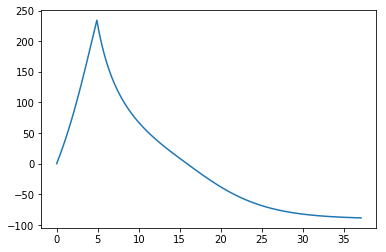

In [113]:
pyplot.figure
pyplot.plot(t,v)
(vmax,index) = max((v,i) for i,v in enumerate(v))
print((vmax,index))
print(h[index])